In [1]:
import pandas as pd
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from keras.layers import LSTM, Dense,Flatten
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from os.path import exists
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import random


In [2]:
#df_failures=pd.read_csv("https://raw.githubusercontent.com/ashishpatel26/Predictive_Maintenance_using_Machine-Learning_Microsoft_Casestudy/master/data/PdM_failures.csv")
#df_machines=pd.read_csv("https://raw.githubusercontent.com/ashishpatel26/Predictive_Maintenance_using_Machine-Learning_Microsoft_Casestudy/master/data/PdM_machines.csv")
#df_telemetry=pd.read_csv("https://raw.githubusercontent.com/ashishpatel26/Predictive_Maintenance_using_Machine-Learning_Microsoft_Casestudy/master/data/PdM_telemetry.csv")

#df_failures.to_csv('equipment_failures.csv')
#df_machines.to_csv('equipment_machines.csv')
#df_telemetry.to_csv('equipment_telemetry.csv')

In [3]:
df_failures=pd.read_csv('equipment_failures.csv')
df_machines=pd.read_csv('equipment_machines.csv')
df_telemetry=pd.read_csv('equipment_telemetry.csv')

In [4]:
df=pd.merge(df_failures,df_machines, on="machineID")
df=pd.merge(df,df_telemetry,on="machineID")
#df=df.sort_values(by="datetime_x")


Discover what the data looks like for the first 100 transactions


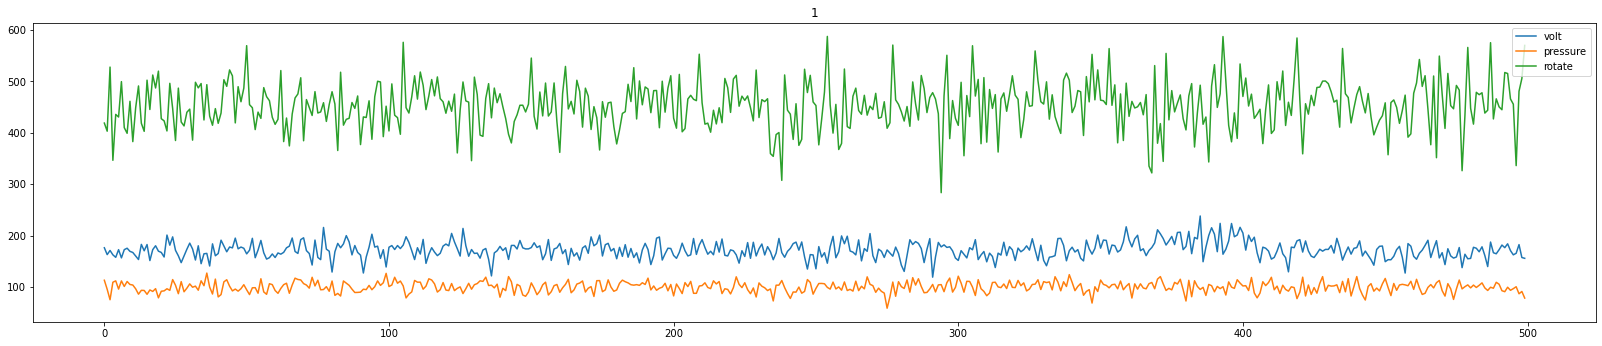

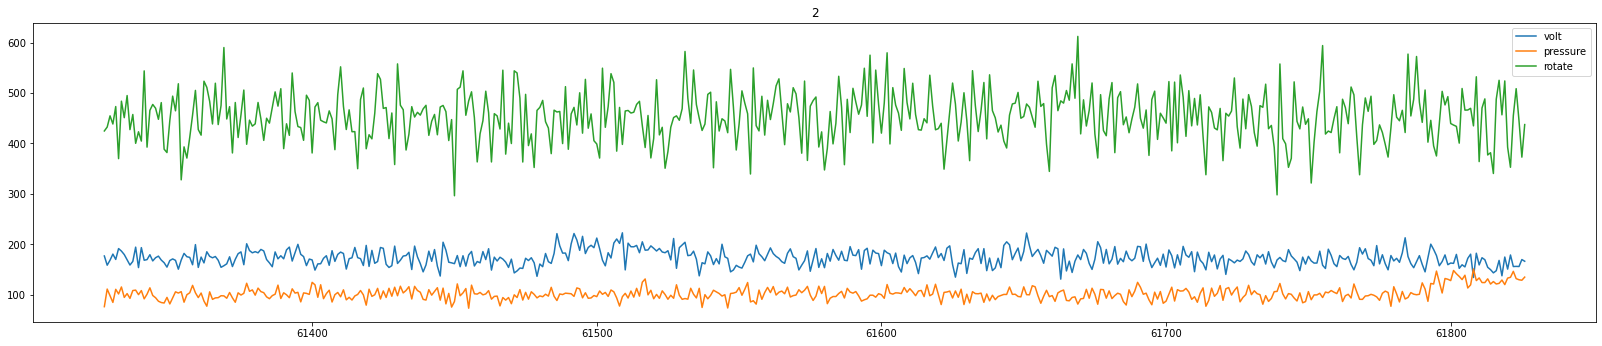

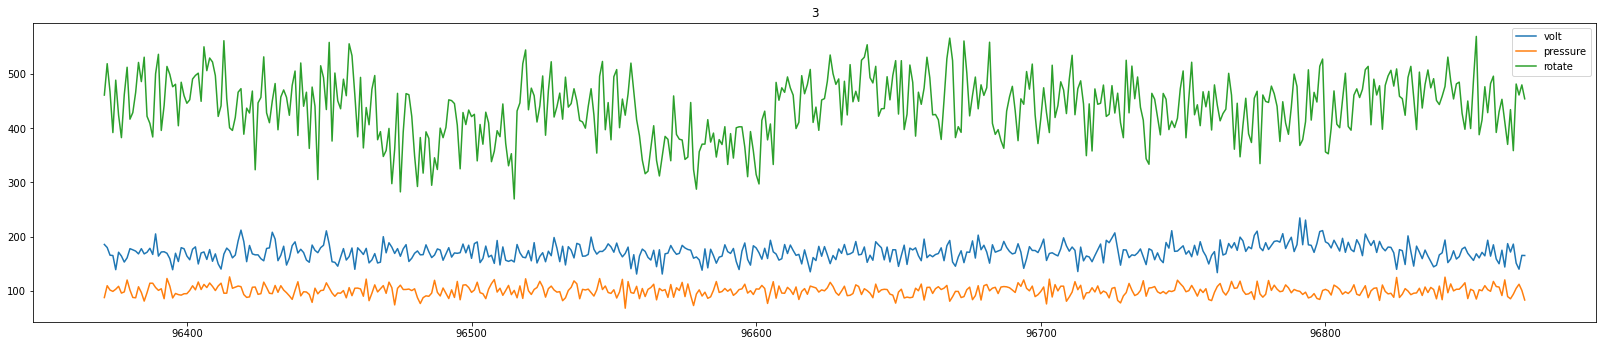

In [5]:
#'machineID', 'label', 'model', 'age', 'volt', 'rotate', 'pressure'
print("Discover what the data looks like for the first 100 transactions")
machineIds=[]
grouped=df.groupby('machineID')
for machineID in grouped:
    machineIds.append(machineID[0])

#print(machineIds)
plt.rcParams["figure.figsize"] = (28,5.5)
for machineId in machineIds[0:3]:
    #print(machineId)
    filter=df['machineID']==machineId
    results=df[filter][:500]
    #print(len(results))
    #print(results['datetime_x'])
    x=range(0,len(results)-1,1)
    plt.plot(results['volt'],label='volt')
    plt.plot(results['pressure'],label='pressure')
    plt.plot(results['rotate'],label='rotate')
    plt.plot(results['vibration'],label='vibration')
    #twin_ax=plt.twinx()
    #twin_ax.plot(results['age'],label='age')
    plt.title(machineId)
    plt.legend()
    plt.show()
    



In [6]:
print("Drop non contributing features and dummy the multi-class output")
if "datetime_x" in df:
    df.drop(["Unnamed: 0","Unnamed: 0_x","Unnamed: 0_y","datetime_y","datetime_x","age"],axis=1,inplace=True)
    df.rename(columns={"failure":"label"},inplace=True)

failure_types=set(df['label'])
#print(failure_types)

encoder=LabelEncoder()
df['label']=encoder.fit_transform(df['label'])
df['model']=encoder.fit_transform(df['model'])

X_columns=[x for x in df.columns if x!='label']

X=df[X_columns]
y=df['label']
#y = np.asarray(y).astype(np.float32)
y = pd.get_dummies(y)

print(y)

print(df.columns)
print(df.head(1))

Drop non contributing features and dummy the multi-class output
         0  1  2  3
0        0  0  0  1
1        0  0  0  1
2        0  0  0  1
3        0  0  0  1
4        0  0  0  1
...     .. .. .. ..
6667116  0  1  0  0
6667117  0  1  0  0
6667118  0  1  0  0
6667119  0  1  0  0
6667120  0  1  0  0

[6667121 rows x 4 columns]
Index(['machineID', 'label', 'model', 'volt', 'rotate', 'pressure',
       'vibration'],
      dtype='object')
   machineID  label  model        volt      rotate    pressure  vibration
0          1      3      2  176.217853  418.504078  113.077935  45.087686


In [7]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

print(X_train.columns)
print("rows",X_train.shape[0],"columns",X_train.shape[1])
print((X_train.shape[0],X_train.shape[1],1))

Index(['machineID', 'model', 'volt', 'rotate', 'pressure', 'vibration'], dtype='object')
rows 4466971 columns 6
(4466971, 6, 1)


In [8]:
print("build the LSTM model")
look_back=1
model = Sequential()
features=len(X_columns)
model.add(LSTM(units=550, activation='tanh', return_sequences=True, input_shape=(look_back, features),dtype="float32"))
model.add(Dropout(0.2))
model.add(LSTM(units = 100, activation='tanh', return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(len(y_train.columns),activation='softmax'))
model.compile(optimizer="rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])

build the LSTM model


In [9]:
print("X train shape",X_train.shape)
#print(X_train)
print("y train shape",y_train.shape)


X train shape (4466971, 6)
y train shape (4466971, 4)


Train the model
loaded weights
0 1000
saved weights


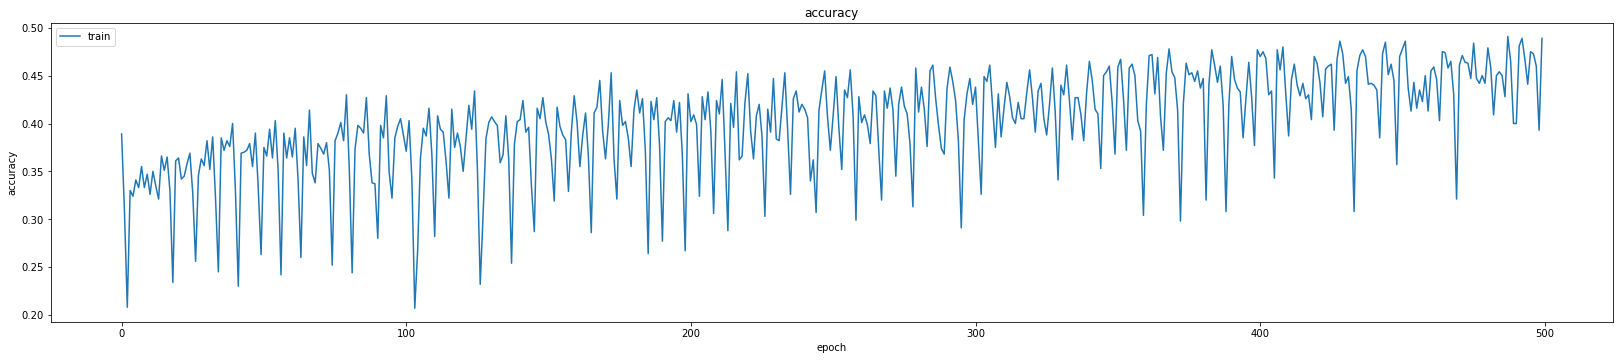

loaded weights
1000 2000
saved weights


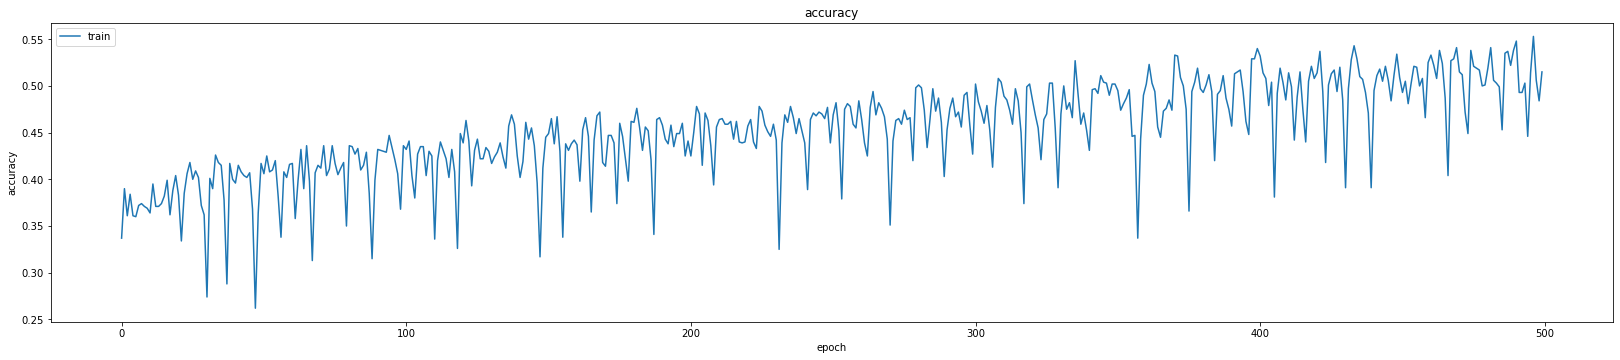

loaded weights
2000 3000
saved weights


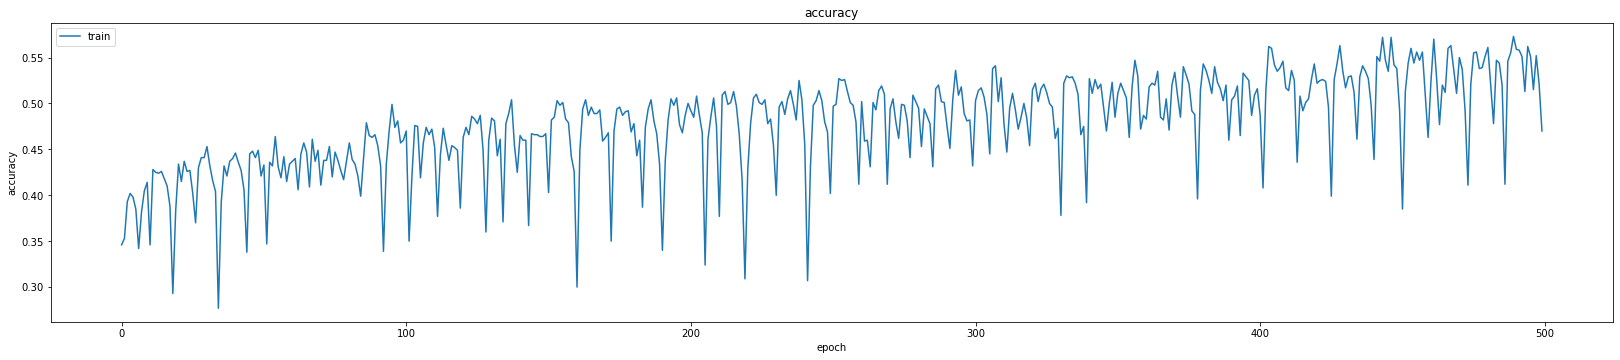

loaded weights
3000 4000
saved weights


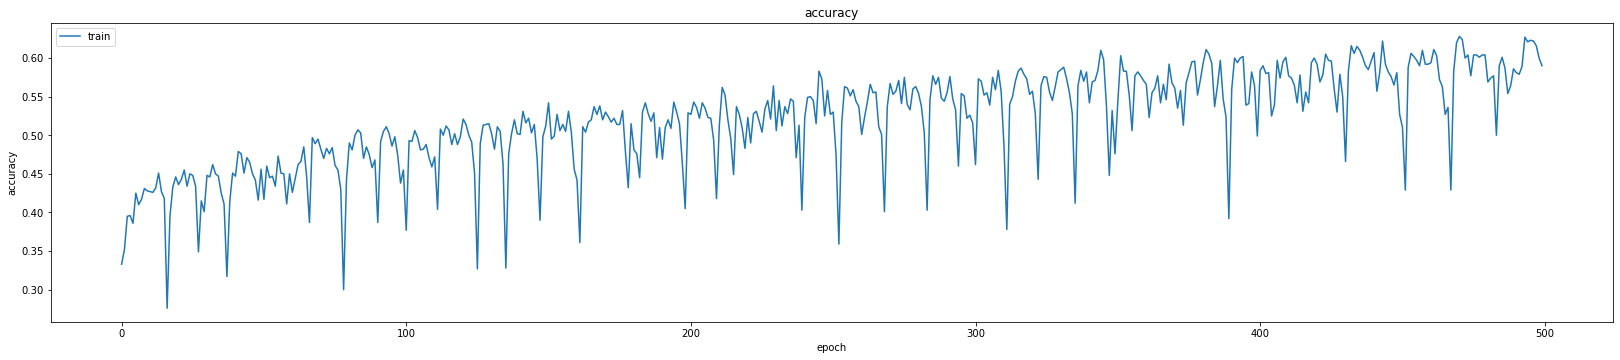

loaded weights
4000 5000
saved weights


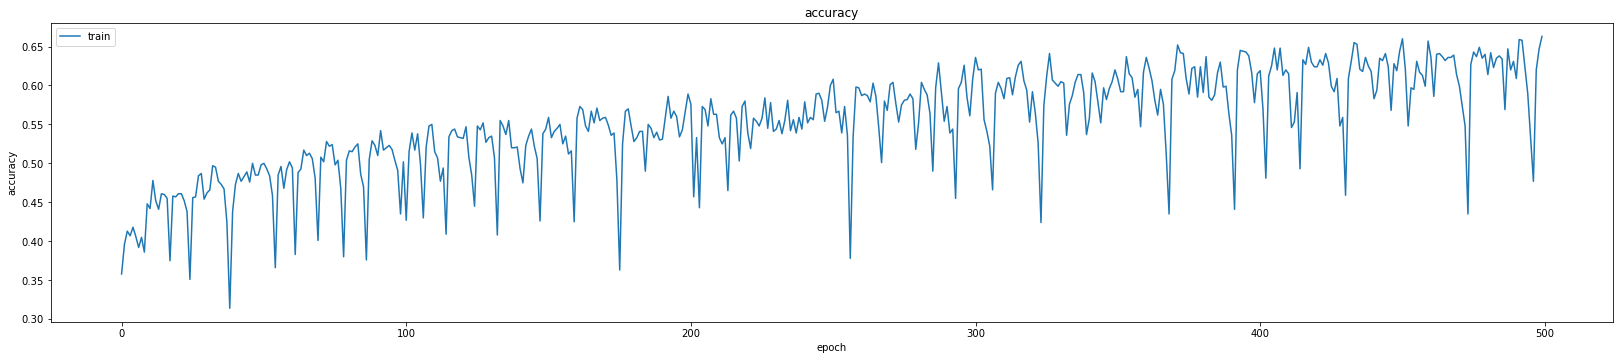

loaded weights
5000 6000
saved weights


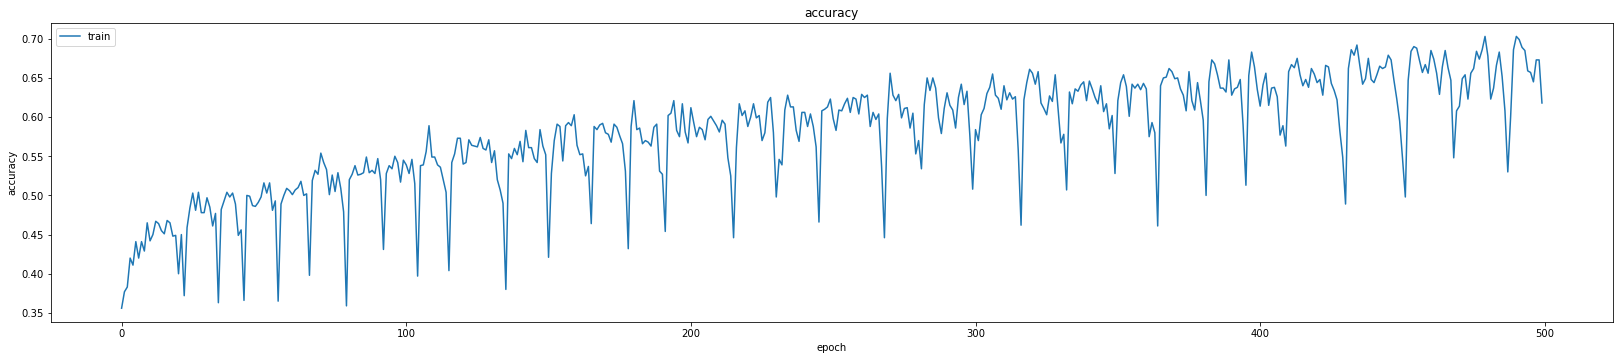

loaded weights
6000 7000
saved weights


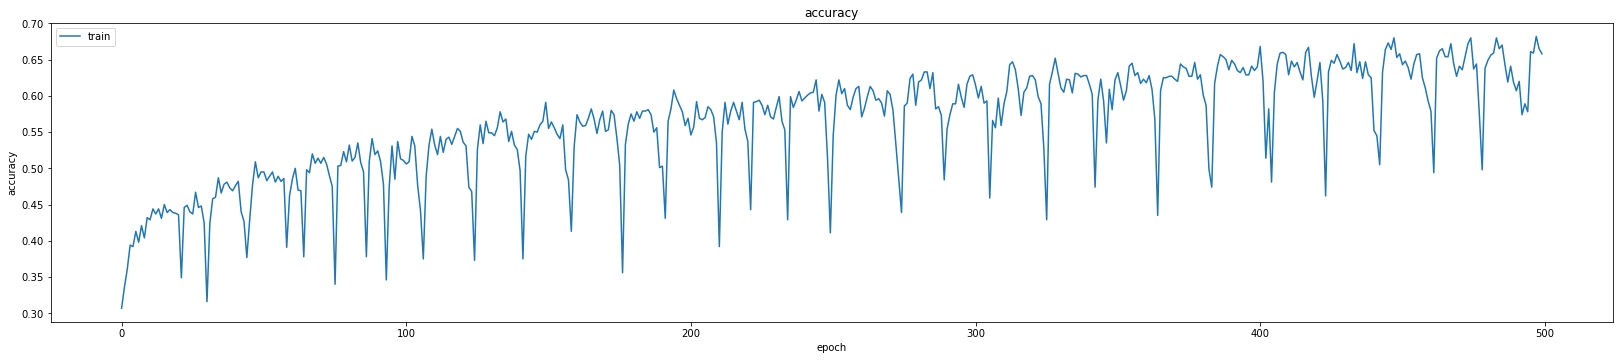

loaded weights
7000 8000
saved weights


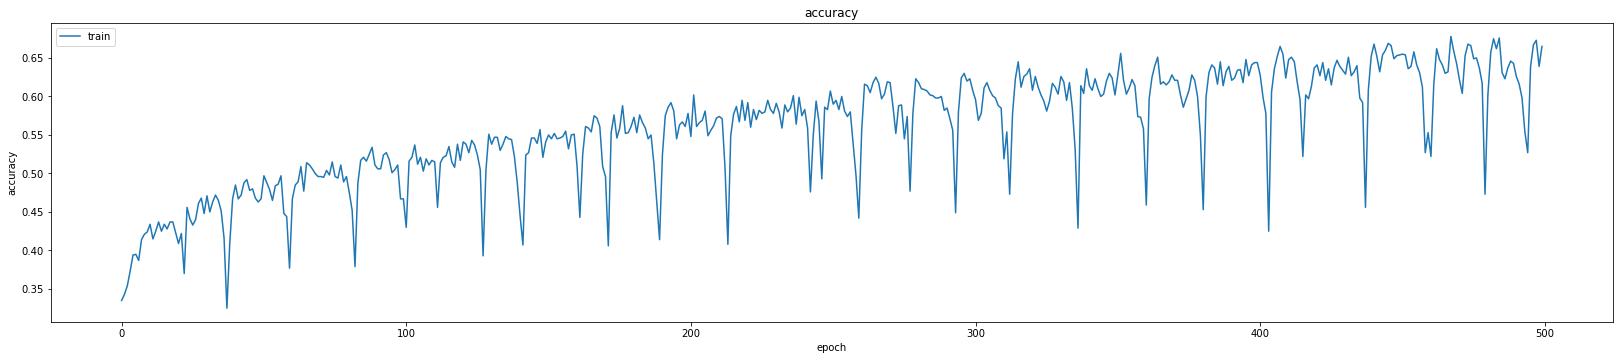

loaded weights
8000 9000
saved weights


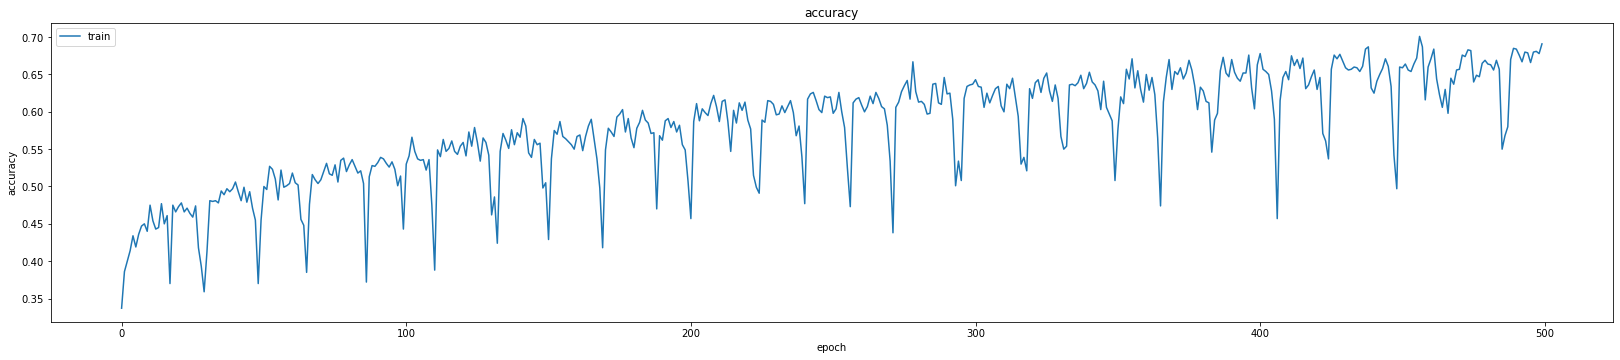

loaded weights
9000 10000
saved weights


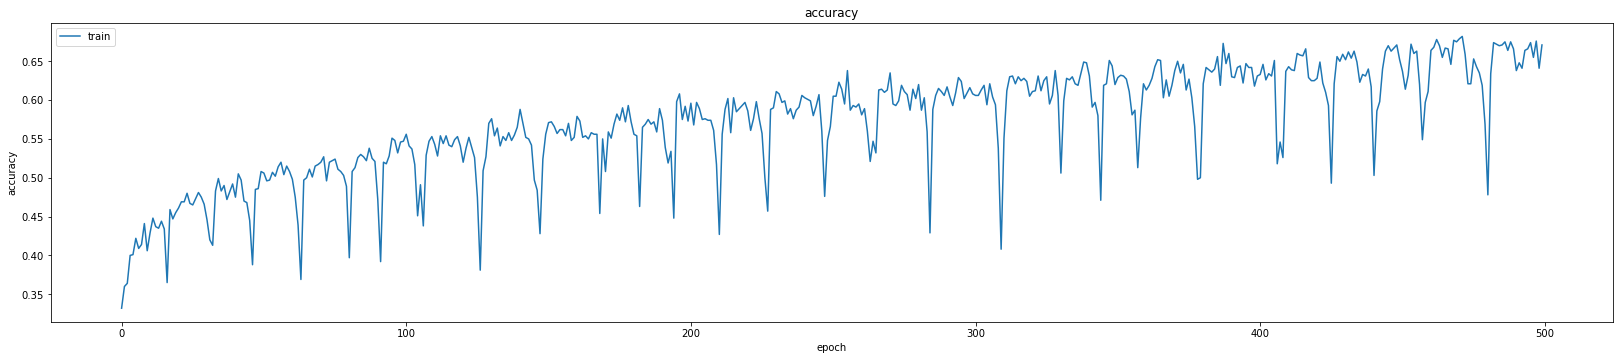

loaded weights
10000 11000
saved weights


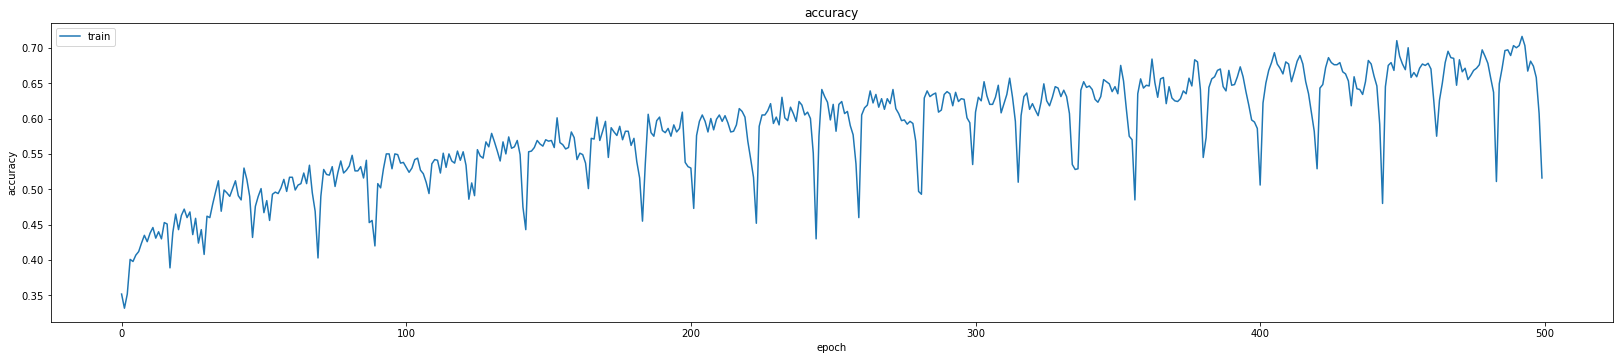

loaded weights
11000 12000
saved weights


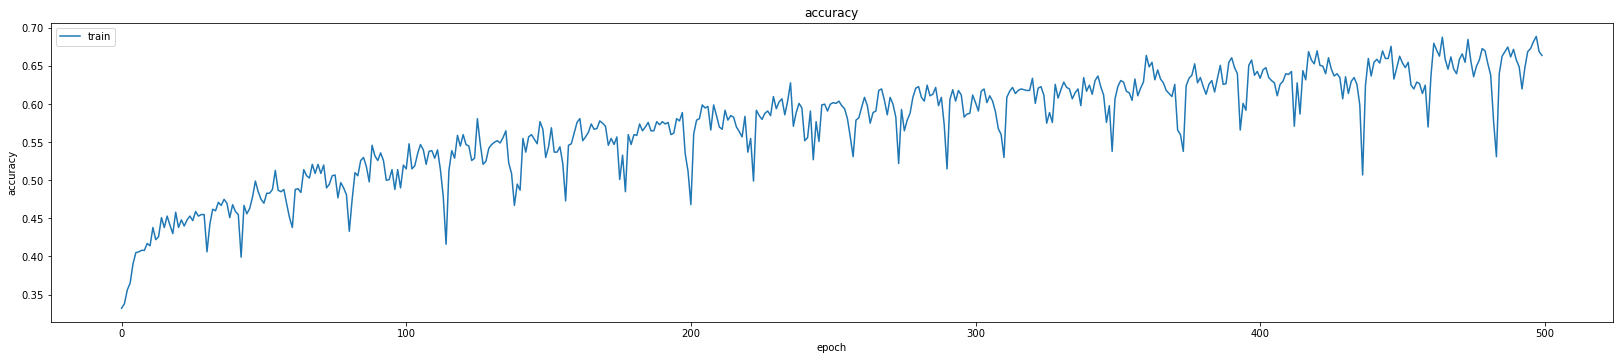

loaded weights
12000 13000
saved weights


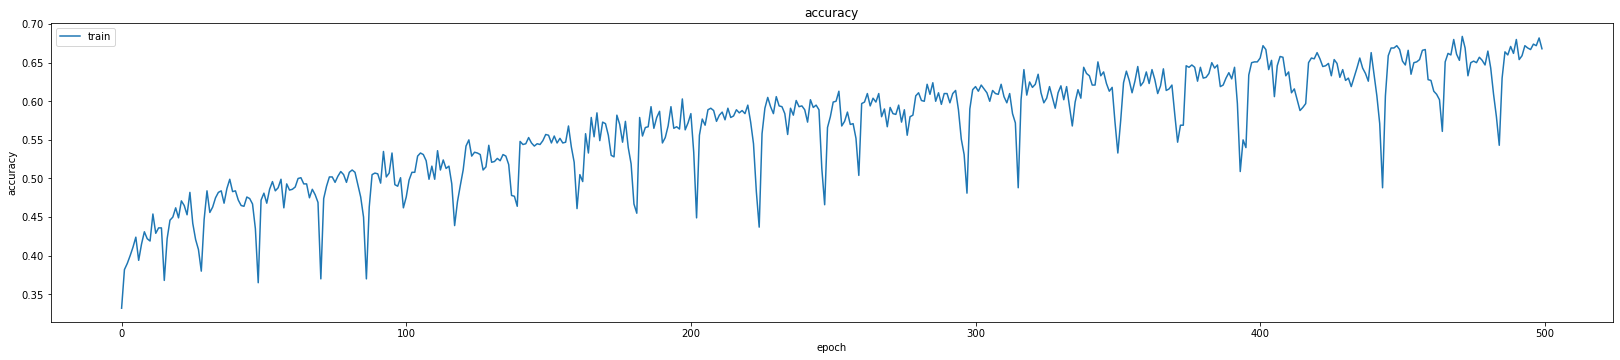

loaded weights
13000 14000
saved weights


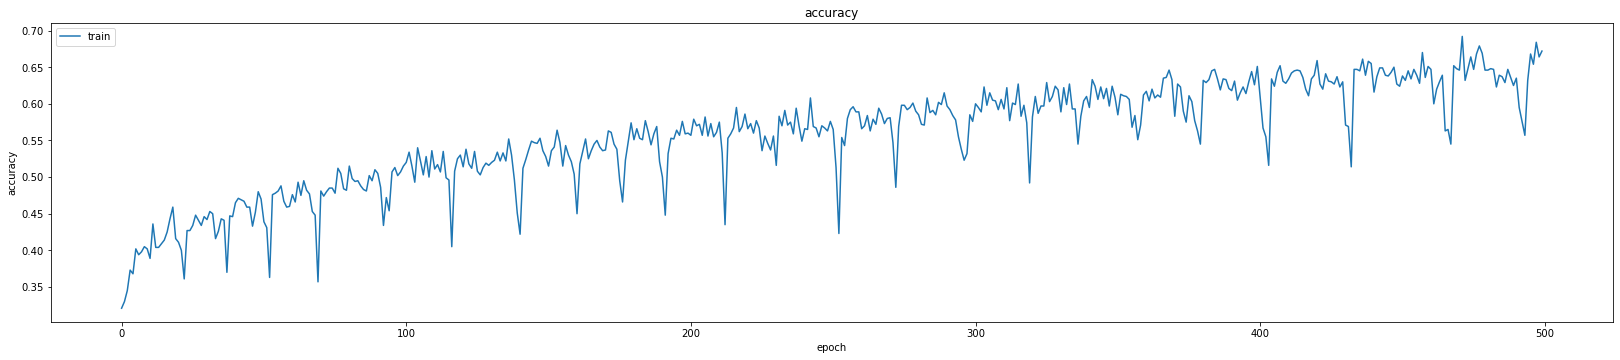

loaded weights
14000 15000
saved weights


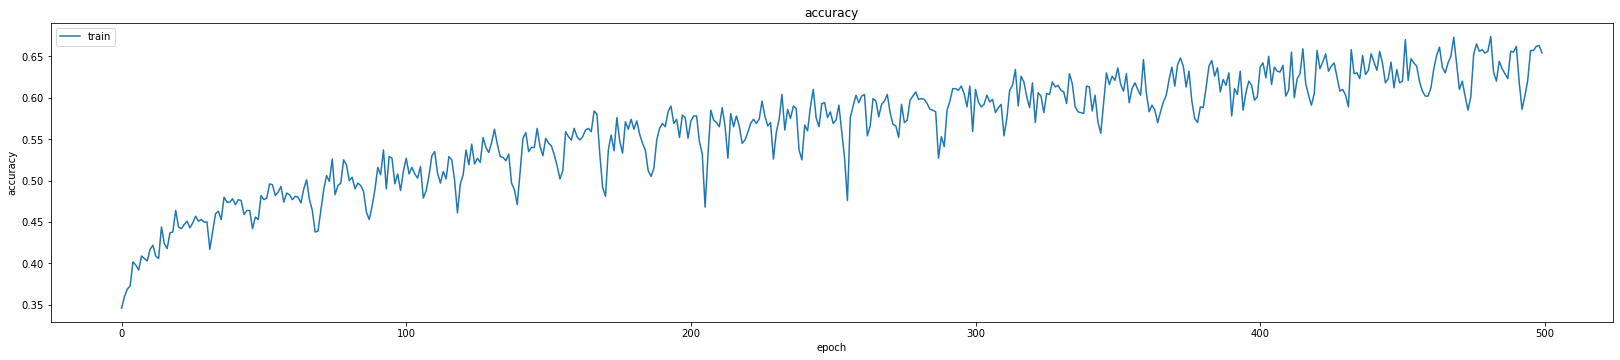

loaded weights
15000 16000
saved weights


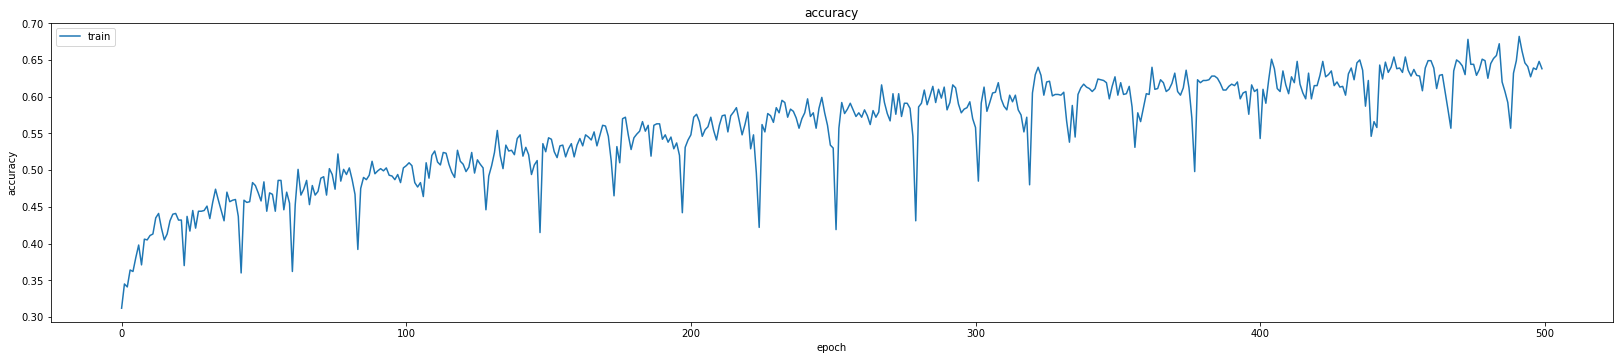

loaded weights
16000 17000
saved weights


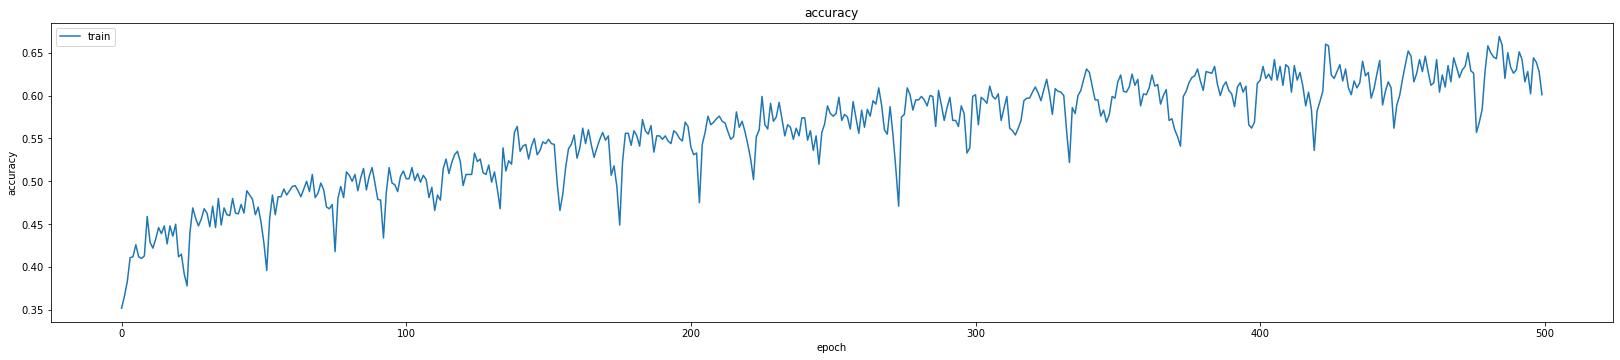

loaded weights
17000 18000
saved weights


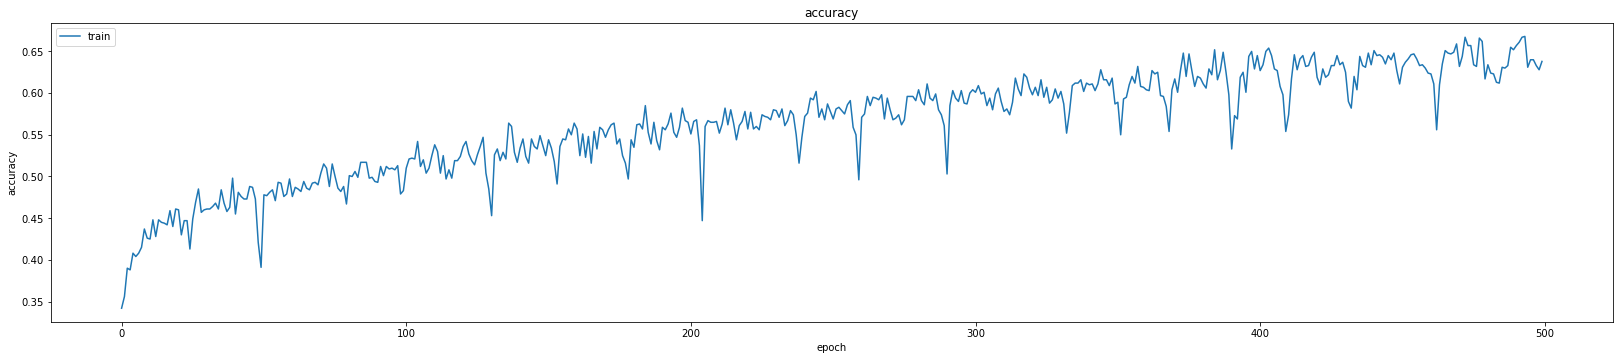

loaded weights
18000 19000
saved weights


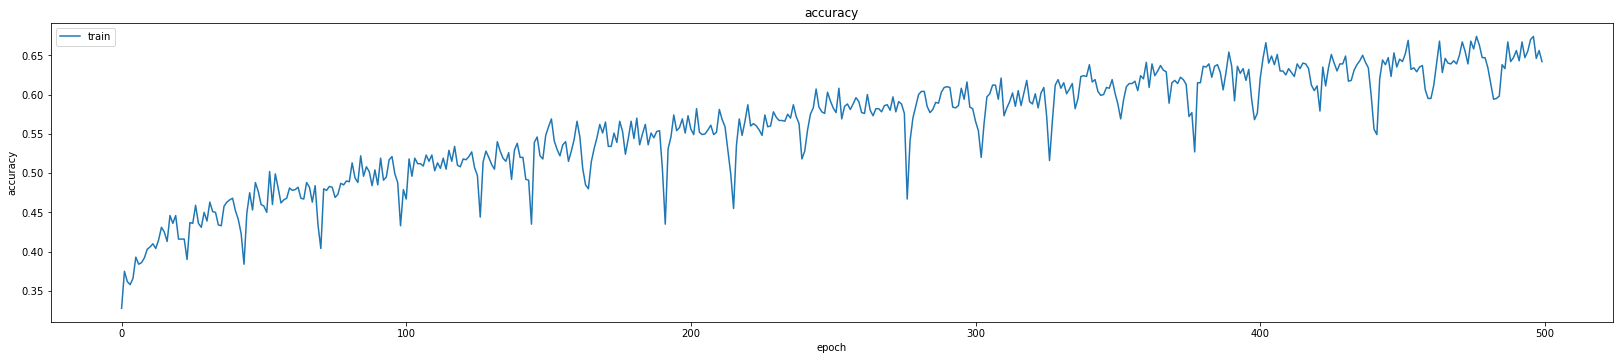

loaded weights
19000 20000


In [ ]:
def plotHistory(history):
        plt.plot(history.history['accuracy'])
        plt.title('accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        
print ("Train the model")
length=len(X_train)
path_to_file="C:\\Users\\dnishimoto\\python_files\\python-deep-learning-master\\lstm_equipment_model.h5"

batch_size=1000
start_pos=0
look_back=1

for index in range(start_pos,length,batch_size):
    if(index>0):
        file_exists = exists(path_to_file)
        if(file_exists):
            model.load_weights(path_to_file)
            print("loaded weights")
        print(index-batch_size,index)
        X = np.asarray(X_train[index-batch_size:index]).astype(np.float32)
        X = np.resize(X,(X.shape[0],look_back,X.shape[1]))
        y = np.asarray(y_train[index-batch_size:index]).astype(np.float32)
        history=model.fit(X,y,batch_size=len(X),epochs=500,verbose=0)
        model.save_weights(path_to_file) # can give whole path to save model
        print("saved weights")
        plotHistory(history)

In [ ]:
print("Random select indices from the dataframe then make a prediction")
size=len(df)
randomlist=[]
for i in range(0,10):
    n = random.randint(1,size)
    randomlist.append(n)
#print(randomlist)

look_back=1
X=df[X_columns].iloc[randomlist]
X = np.asarray(X).astype(np.float32)
X = np.resize(X,(X.shape[0],look_back=1,X.shape[1]))
y_pred=model.predict(X)
print(y_pred)


In [238]:
model.summary()



Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_66 (LSTM)              (None, 1, 550)            1225400   
                                                                 
 dropout_60 (Dropout)        (None, 1, 550)            0         
                                                                 
 lstm_67 (LSTM)              (None, 1, 100)            260400    
                                                                 
 dropout_61 (Dropout)        (None, 1, 100)            0         
                                                                 
 lstm_68 (LSTM)              (None, 50)                30200     
                                                                 
 dropout_62 (Dropout)        (None, 50)                0         
                                                                 
 flatten_21 (Flatten)        (None, 50)              